In [1]:
# Imported relevant Python packages that may be of use during the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Created 2 dataframe variables to store the data from the 311cityservicerequests CSV file and 2011-2015wards CSV file in order to manipulate and analyze them
sr = pd.read_csv("311cityservicerequests.csv")
wd = pd.read_csv("2011-2015wards.csv")

In [3]:
# Sliced the ward dataset to only include the columns with estimate measures for each ward and the rows (80-108) that are specifically relevant as civillian income measures and saved the sliced dataset as a new dataframe called wd2
wd2 = wd[["Unnamed: 1","Unnamed: 5","Unnamed: 9","Unnamed: 13","Unnamed: 17", "Unnamed: 21","Unnamed: 25","Unnamed: 29"]]
wd2 = wd2[80:109]

In [4]:
# Inserted a new column called Measure at column index 0 in the new ward dataframe that describes the measured estimates in each row for each ward by using the descriptions for the estimates present between rows 80 and 108 from the initial ward dataset.
wd2.insert(0, "Measure", wd.iloc[80:109, 0])

In [5]:
# Renamed the columns in the new ward dataframe
wd2.columns = ["Measure of Income","Ward 1","Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"]

In [6]:
# Dropped all missing/NA values from the new ward dataframe and reset the index
wd2 = wd2.dropna()
wd2 = wd2.reset_index()

In [7]:
# Created a new ward data frame called wd3 by slicing wd2 so that it only includes estimates for Median Household Income (dollars) and Mean Household Income (dollars) for each ward
wd3 = wd2[:2]

In [8]:
# Created a new ward data frame called wd4 by slicing wd2 so that it only includes estimates for Median Family Income (dollars) and Mean Family Income (dollars) for each ward
wd4 = wd2[24:26]

In [9]:
# Created a new ward dataframe called finalwd by concatenating the wd3 and wd4 dataframes to include Median Household Income (dollars), Mean Household Income (dollars), Median Family Income (dollars), and Mean Family Income (dollars) for each ward
finalwd = pd.concat([wd3,wd4])
# Reset the finalwd dataframe's index 
finalwd = finalwd.reset_index()

In [10]:
# Sliced the finalwd dataframe to only include the Measure of Income, Ward 1, Ward 2, Ward 3, Ward 4, Ward 5, Ward 6, Ward 7, and Ward 8 columns
finalwd = finalwd.loc[:, ["Measure of Income","Ward 1","Ward 2", "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"]]
# Set the index of the finalwd dataframe as the Measure of Income column
finalwd = finalwd.set_index('Measure of Income')

In [11]:
# Created a new ward dataframe called switchedwd by switching the columns and the rows of the finalwd dataframe by using the transpose function from the Pandas library 
switchedwd = finalwd.T
# Reset the switchedwd dataframe's index 
switchedwd = switchedwd.reset_index()

In [12]:
# Renamed the columns in the switchedwd dataframe and replaced the Ward column's values to only include the number of the ward in order to match the format of the 311 service requests dataframe
switchedwd.columns = ["Ward", "Median Household Income (dollars)","Mean Household Income (dollars)", "Median Family Income (dollars)", "Mean Family Income (dollars)"]
switchedwd.Ward = switchedwd.Ward.replace({"Ward 1": 1, "Ward 2": 2, "Ward 3": 3, "Ward 4": 4, "Ward 5": 5, "Ward 6": 6, "Ward 7": 7, "Ward 8": 8})

In [13]:
# Edited out the commas from each value under the Median Household Income (dollars), Mean Household Income (dollars), Median Family Income (dollars), and Mean Family Income (dollars) columns and converted the dataframe objects into floats 
switchedwd['Median Household Income (dollars)'] = switchedwd['Median Household Income (dollars)'].str.replace(",","").astype(float)
switchedwd['Mean Household Income (dollars)'] = switchedwd['Mean Household Income (dollars)'].str.replace(",","").astype(float)
switchedwd['Median Family Income (dollars)'] = switchedwd['Median Family Income (dollars)'].str.replace(",","").astype(float)
switchedwd['Mean Family Income (dollars)'] = switchedwd['Mean Family Income (dollars)'].str.replace(",","").astype(float)
# Printed the switchedwd dataframe
switchedwd

,Ward,Median Household Income (dollars),Mean Household Income (dollars),Median Family Income (dollars),Mean Family Income (dollars)
0,1,82159.0,106388.0,91406.0,122966.0
1,2,100388.0,140459.0,184150.0,231977.0
2,3,112873.0,176921.0,200395.0,277386.0
3,4,74600.0,111933.0,94741.0,135301.0
4,5,57554.0,77329.0,70655.0,89812.0
5,6,94343.0,117002.0,125278.0,151602.0
6,7,39165.0,53093.0,43712.0,61691.0
7,8,30910.0,44245.0,32678.0,49187.0


In [14]:
# Created the srbyward dataframe by slicing the service request dataframe (sr) to only include the WARD, SERVICECODEDESCRIPTION, and SERVICECALLCOUNT columns and grouped the dataframe's values by WARD and SERVICECODEDESCRIPTION before aggregating each SERVICECODEDESCRIPTION's count
srbyward = sr[["WARD","SERVICECODEDESCRIPTION","SERVICECALLCOUNT"]].groupby(["WARD","SERVICECODEDESCRIPTION"]).agg("count")
# Reset the srbyward dataframe's index
srbyward = srbyward.reset_index()
# Renamed the columns in the srbyward dataframe
srbyward.columns = ["Ward","Service Request Type","Number of 311 Service Requests"]
# Printed out the first few rows of the srbyward dataset
srbyward.head()

,Ward,Service Request Type,Number of 311 Service Requests
0,1,Abandoned Vehicle - On Private Property,35
1,1,Abandoned Vehicle - On Public Property,253
2,1,Alley Cleaning,1494
3,1,Alley Repair,129
4,1,Alleylight Repair Investigation,199


In [15]:
# Created a new srparking dataframe by slicing the srbyward dataframe conditionally to only include parking-related service requests such as Emergency No-Parking Verification, Out of State Parking Violation (ROSA), Parking Enforcement, Parking Meter Repair, Resident Parking Permit, and Residential Parking Permit Violation
srparking = srbyward.loc[(srbyward["Service Request Type"]=="Emergency No-Parking Verification") | (srbyward["Service Request Type"]=="Out of State Parking Violation (ROSA)") | (srbyward["Service Request Type"]=="Parking Enforcement") | (srbyward["Service Request Type"]=="Parking Meter Repair") | (srbyward["Service Request Type"]=="Resident Parking Permit") | (srbyward["Service Request Type"]=="Residential Parking Permit Violation")]
# Printed out the first few rows of the srparking dataset
srparking.head()

,Ward,Service Request Type,Number of 311 Service Requests
29,1,Emergency No-Parking Verification,1275
53,1,Out of State Parking Violation (ROSA),98
54,1,Parking Enforcement,4282
55,1,Parking Meter Repair,4697
64,1,Resident Parking Permit,19


In [16]:
# Created a new srnotparking dataframe by performing an outer merge between srbyward and srparking such that it subtracts all srparking rows from the srbyward dataframe in order to only include non-parking related 311 service requests
srnotparking =  pd.merge(srbyward, srparking, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
# Printed out the first few rows of the srnotparking dataset
srnotparking.head()

,Ward,Service Request Type,Number of 311 Service Requests
0,1,Abandoned Vehicle - On Private Property,35
1,1,Abandoned Vehicle - On Public Property,253
2,1,Alley Cleaning,1494
3,1,Alley Repair,129
4,1,Alleylight Repair Investigation,199


In [17]:
# Created a new column called Total, with the same contents as Ward, in the srbyward dataframe
srbyward["Total"] = srbyward["Ward"]
# Replaced the values from the Total column with the sum of all 311 service requests recieved per ward
srbyward.Total = srbyward.Total.replace({1: srbyward.loc[srbyward['Ward'] == 1, 'Number of 311 Service Requests'].sum(), 2: srbyward.loc[srbyward['Ward'] == 2, 'Number of 311 Service Requests'].sum(), 3: srbyward.loc[srbyward['Ward'] == 3, 'Number of 311 Service Requests'].sum(), 4: srbyward.loc[srbyward['Ward'] == 4, 'Number of 311 Service Requests'].sum(), 5: srbyward.loc[srbyward['Ward'] == 5, 'Number of 311 Service Requests'].sum(), 6: srbyward.loc[srbyward['Ward'] == 6, 'Number of 311 Service Requests'].sum(), 7: srbyward.loc[srbyward['Ward'] == 7, 'Number of 311 Service Requests'].sum(), 8: srbyward.loc[srbyward['Ward'] == 8, 'Number of 311 Service Requests'].sum()})
# Renamed the columns in the srbyward dataframe 
srbyward.columns = ["Ward","Service Request Type","Number of 311 Service Requests","Total 311 Service Requests per Ward"]
# Printed out the first few rows of the srbyward dataset
srbyward.head()

,Ward,Service Request Type,Number of 311 Service Requests,Total 311 Service Requests per Ward
0,1,Abandoned Vehicle - On Private Property,35,29428
1,1,Abandoned Vehicle - On Public Property,253,29428
2,1,Alley Cleaning,1494,29428
3,1,Alley Repair,129,29428
4,1,Alleylight Repair Investigation,199,29428


In [18]:
# Reset the srparking dataframe's index
srparking = srparking.reset_index()
# Created a new srparking2 dataframe that is a copy of the srparking dataframe for later use
srparking2 = srparking.copy()
# Sliced the srparking dataframe to only include Ward, Service Request Type, and Number of 311 Service Requests columns from the dataframe
srparking = srparking.loc[:, ["Ward","Service Request Type","Number of 311 Service Requests"]]
# Created a new column called Total, with the same contents as Ward, in the srparking dataframe
srparking["Total"] = srparking["Ward"]
# Replaced the values from the Total column with the sum of all parking-related 311 service requests recieved per ward
srparking.Total = srparking.Total.replace({1: srparking.loc[srparking['Ward'] == 1, 'Number of 311 Service Requests'].sum(), 2: srparking.loc[srparking['Ward'] == 2, 'Number of 311 Service Requests'].sum(), 3: srparking.loc[srparking['Ward'] == 3, 'Number of 311 Service Requests'].sum(), 4: srparking.loc[srparking['Ward'] == 4, 'Number of 311 Service Requests'].sum(), 5: srparking.loc[srparking['Ward'] == 5, 'Number of 311 Service Requests'].sum(), 6: srparking.loc[srparking['Ward'] == 6, 'Number of 311 Service Requests'].sum(), 7: srparking.loc[srparking['Ward'] == 7, 'Number of 311 Service Requests'].sum(), 8: srparking.loc[srparking['Ward'] == 8, 'Number of 311 Service Requests'].sum()})
# Renamed the columns in the srparking dataframe 
srparking.columns = ["Ward","Service Request Type","Number of 311 Service Requests","Total 311 Service Requests per Ward"]
# Printed out the first few rows of the srparking dataset
srparking.head()

,Ward,Service Request Type,Number of 311 Service Requests,Total 311 Service Requests per Ward
0,1,Emergency No-Parking Verification,1275,10851
1,1,Out of State Parking Violation (ROSA),98,10851
2,1,Parking Enforcement,4282,10851
3,1,Parking Meter Repair,4697,10851
4,1,Resident Parking Permit,19,10851


In [19]:
# Reset the srnotparking dataframe's index
srnotparking = srnotparking.reset_index()
# Created a new srnotparking2 dataframe that is a copy of the srnotparking dataframe for later use
srnotparking2 = srnotparking.copy()
# Sliced the srnotparking dataframe to only include Ward, Service Request Type, and Number of 311 Service Requests columns from the dataframe
srnotparking = srnotparking.loc[:, ["Ward","Service Request Type","Number of 311 Service Requests"]]
# Created a new column called Total, with the same contents as Ward, in the srnotparking dataframe
srnotparking["Total"] = srnotparking["Ward"]
# Replaced the values from the Total column with the sum of all non-parking related 311 service requests recieved per ward
srnotparking.Total = srnotparking.Total.replace({1: srnotparking.loc[srnotparking['Ward'] == 1, 'Number of 311 Service Requests'].sum(), 2: srnotparking.loc[srnotparking['Ward'] == 2, 'Number of 311 Service Requests'].sum(), 3: srnotparking.loc[srnotparking['Ward'] == 3, 'Number of 311 Service Requests'].sum(), 4: srnotparking.loc[srnotparking['Ward'] == 4, 'Number of 311 Service Requests'].sum(), 5: srnotparking.loc[srnotparking['Ward'] == 5, 'Number of 311 Service Requests'].sum(), 6: srnotparking.loc[srnotparking['Ward'] == 6, 'Number of 311 Service Requests'].sum(), 7: srnotparking.loc[srnotparking['Ward'] == 7, 'Number of 311 Service Requests'].sum(), 8: srnotparking.loc[srnotparking['Ward'] == 8, 'Number of 311 Service Requests'].sum()})
# Renamed the columns in the srnotparking dataframe 
srnotparking.columns = ["Ward","Service Request Type","Number of 311 Service Requests","Total 311 Service Requests per Ward"]
# Printed out the first few rows of the srnotparking dataset
srnotparking.head()

,Ward,Service Request Type,Number of 311 Service Requests,Total 311 Service Requests per Ward
0,1,Abandoned Vehicle - On Private Property,35,18577
1,1,Abandoned Vehicle - On Public Property,253,18577
2,1,Alley Cleaning,1494,18577
3,1,Alley Repair,129,18577
4,1,Alleylight Repair Investigation,199,18577


In [20]:
# Sliced the srnotparking2 dataframe to only include the Ward and Number of 311 Service Requests columns and grouped the dataframe's values by Ward before aggregating each Ward's sum of non-parking related 311 service requests
srnotparking2 = srnotparking2[["Ward","Number of 311 Service Requests"]].groupby(["Ward"]).agg("sum")
# Reset the srnotparking2 dataframe's index
srnotparking2 = srnotparking2.reset_index()
# Renamed the columns in the srnotparking2 dataframe 
srnotparking2.columns = ["Ward","Number of 311 Non-Parking Service Requests"]
# Printed out the srnotparking2 dataset
srnotparking2

,Ward,Number of 311 Non-Parking Service Requests
0,1,18577
1,2,16967
2,3,21804
3,4,34290
4,5,30187
5,6,29911
6,7,24138
7,8,15059


In [21]:
# Sliced the srparking2 dataframe to only include the Ward and Number of 311 Service Requests columns and grouped the dataframe's values by Ward before aggregating each Ward's sum of parking related 311 service requests
srparking2 = srparking2[["Ward","Number of 311 Service Requests"]].groupby(["Ward"]).agg("sum")
# Reset the srparking2 dataframe's index
srparking2 = srparking2.reset_index()
# Renamed the columns in the srparking2 dataframe 
srparking2.columns = ["Ward","Number of 311 Parking-Related Service Requests"]
# Printed out the srparking2 dataset
srparking2

,Ward,Number of 311 Parking-Related Service Requests
0,1,10851
1,2,66073
2,3,9184
3,4,5212
4,5,6082
5,6,30342
6,7,2346
7,8,1955


In [22]:
# Created a new allrequests dataframe that outer merges the srnotparking2 and srparking2 on Ward
allrequests = pd.merge(srnotparking2,srparking2,how="outer",on=["Ward"],suffixes = ["_notparking","_parking"])
# Created a new column called Total Number of 311 Service Requests in the allrequests dataframe that sums the Number of 311 Non-Parking Service Requests and the Number of 311 Parking-Related Service Requests across each row
allrequests["Total Number of 311 Service Requests"] = allrequests[["Number of 311 Non-Parking Service Requests","Number of 311 Parking-Related Service Requests"]].sum(1)
# Outer merged the allrequests dataframe with the switchedwd dataframe on Ward to include average income data per ward into the dataframe as well
allrequests = pd.merge(allrequests, switchedwd, how="outer",on=["Ward"],suffixes = ["_requests","_income"])
# Printed out the allrequests dataframe
allrequests

,Ward,Number of 311 Non-Parking Service Requests,Number of 311 Parking-Related Service Requests,Total Number of 311 Service Requests,Median Household Income (dollars),Mean Household Income (dollars),Median Family Income (dollars),Mean Family Income (dollars)
0,1,18577,10851,29428,82159.0,106388.0,91406.0,122966.0
1,2,16967,66073,83040,100388.0,140459.0,184150.0,231977.0
2,3,21804,9184,30988,112873.0,176921.0,200395.0,277386.0
3,4,34290,5212,39502,74600.0,111933.0,94741.0,135301.0
4,5,30187,6082,36269,57554.0,77329.0,70655.0,89812.0
5,6,29911,30342,60253,94343.0,117002.0,125278.0,151602.0
6,7,24138,2346,26484,39165.0,53093.0,43712.0,61691.0
7,8,15059,1955,17014,30910.0,44245.0,32678.0,49187.0


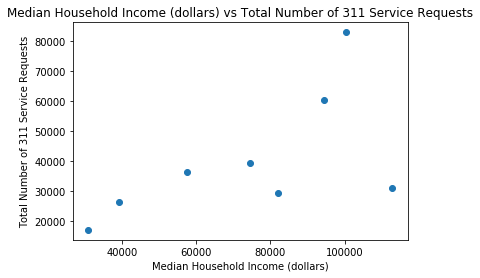

In [23]:
# Plotted the Median Household Income (dollars) values against the Total Number of 311 Service Requests values from the allrequests dataframe to find a correlation between the two
plt.scatter(allrequests["Median Household Income (dollars)"], allrequests["Total Number of 311 Service Requests"])
# Labeled the x axis of the visualization as "Median Household Income (dollars)"
plt.xlabel('Median Household Income (dollars)')
# Labeled the y axis of the visualization as "Total Number of 311 Service Requests"
plt.ylabel('Total Number of 311 Service Requests')
# Titled the visualization as "Median Household Income (dollars) vs Total Number of 311 Service Requests"
plt.title('Median Household Income (dollars) vs Total Number of 311 Service Requests')
# Resized the visualization
plt.rcParams["figure.figsize"] = [6, 5]
# Displayed/printed the visualiztion to view the scatterplot graph and changes made
plt.show()

In [24]:
allrequests[["Median Household Income (dollars)", "Total Number of 311 Service Requests"]].corr()

,Median Household Income (dollars),Total Number of 311 Service Requests
Median Household Income (dollars),1.000000,0.601485
Total Number of 311 Service Requests,0.601485,1.000000


<b>Analysis</b>

I chose to use the median household income as my average measure of income since income is a skewed result as its distribution is not uniform and symmetrical but rather skewed to the right. Hence, it is a better measure of average household income in comparison to mean household income. As it can be obeserved from the graph above, there does seem to be a gradually increasing trend between Median Household Income (dollars) and Total Number of 311 Service Requests despite one huge outlier (Ward 3). Due to the large outlier, I would conclude that there is a moderate positive correlation, with a Pearson's r of 0.601, between median household income and Total Number of 311 Service Requests. This means that an association between average household income and service requests, though slightly weak, can generally be perceived from the graph's results. I believe the association is likely due to the fact that populations of wards with high median household income would generally pay more for their homes and live in more expensive neighborhoods. Hence, they may have higher expectations for their respective wards and as such, take up a greater responsbility in keeping their neighbourhood clean and fault-free by placing more 311 service request calls. Additionally, parking-related service requests makes up for a huge share of 311 service request calls and therefore, the relationship between median household income and 311 Service Requests may be better analyzed when specifically considering parking-related service requests alone.

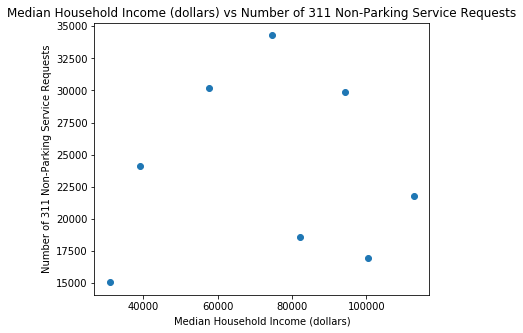

In [25]:
# Plotted the Median Household Income (dollars) values against the Number of 311 Non-Parking Service Requests values from the allrequests dataframe to find a correlation between the two
plt.scatter(allrequests["Median Household Income (dollars)"], allrequests["Number of 311 Non-Parking Service Requests"])
# Labeled the x axis of the visualization as "Median Household Income (dollars)"
plt.xlabel('Median Household Income (dollars)')
# Labeled the y axis of the visualization as "Number of 311 Non-Parking Service Requests"
plt.ylabel('Number of 311 Non-Parking Service Requests')
# Titled the visualization as "Median Household Income (dollars) vs Number of 311 Non-Parking Service Requests"
plt.title('Median Household Income (dollars) vs Number of 311 Non-Parking Service Requests')
# Resized the visualization
plt.rcParams["figure.figsize"] = [6, 5]
# Displayed/printed the visualiztion to view the scatterplot graph and changes made
plt.show()

In [26]:
allrequests[["Median Household Income (dollars)", "Number of 311 Non-Parking Service Requests"]].corr()

,Median Household Income (dollars),Number of 311 Non-Parking Service Requests
Median Household Income (dollars),1.000000,0.062573
Number of 311 Non-Parking Service Requests,0.062573,1.000000


<b>Analysis</b>

When comparing the Number of 311 Non-Parking Service Requests against Median Household Income (dollars), it can be observed that there is barely a perceptible correlation between the two variables with a highly negligible Pearson's r of 0.063.

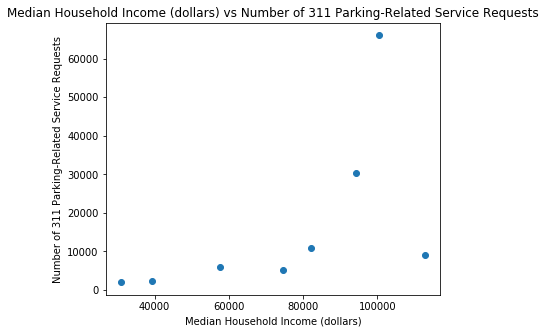

In [27]:
# Plotted the Median Household Income (dollars) values against the NNumber of 311 Parking-Related Service Requests values from the allrequests dataframe to find a correlation between the two
plt.scatter(allrequests["Median Household Income (dollars)"], allrequests["Number of 311 Parking-Related Service Requests"])
# Labeled the x axis of the visualization as "Median Household Income (dollars)"
plt.xlabel('Median Household Income (dollars)')
# Labeled the y axis of the visualization as "Number of 311 Parking-Related Service Requests"
plt.ylabel('Number of 311 Parking-Related Service Requests')
# Titled the visualization as "Median Household Income (dollars) vs Number of 311 Parking-Related Service Requests"
plt.title('Median Household Income (dollars) vs Number of 311 Parking-Related Service Requests')
# Resized the visualization
plt.rcParams["figure.figsize"] = [6, 5]
# Displayed/printed the visualiztion to view the scatterplot graph and changes made
plt.show()

In [28]:
allrequests[["Median Household Income (dollars)", "Number of 311 Parking-Related Service Requests"]].corr()

,Median Household Income (dollars),Number of 311 Parking-Related Service Requests
Median Household Income (dollars),1.000000,0.563273
Number of 311 Parking-Related Service Requests,0.563273,1.000000


<b>Analysis</b>

When comparing the Number of 311 Parking-Related Service Requests against Median Household Income in Washington D.C., it can be observed from the graph that there is a similar, moderate positive correlation with a Pearson's r of 0.563 between the variables as seen in the first graph. Once again, there is one huge outlier (Ward 3) that brings the overall correlation's strength down much like the first graph as well. A reason for why a positive correlation between parking-related service requests and median household income exists is that people living in wards with a lower median household income may not own or use cars, due to a car's expensive cost and their limited budget, and instead depend upon public transport for their transportation needs. Therefore, there would be a higher number of car owners living in wards with a higher median household income which would inevitably lead to a greater number of parking-related service requests among these wards too. This would also explain why the Median Household Income vs Number of 311 Non-Parking Service Requests scatterplot showed no correlation between the two variables since there was no clear economic reason behind why non-parking related service requests would positively correlate with median household income.

<b>Conclusion</b>

In conclusion, it can be observed that while not exactly strong, there is a positive correlation between Total Number of 311 Service Requests and Median Household Income as well as between Number of 311 Parking-Related Service Requests and Median Household Income in Washington D.C. Meanwhile, there is no true correlation whatsoever between the Number of 311 Non-Parking Service Requests and Median Household Income in Washington D.C. Based on these observations, the positive correlation between the Number of 311 Parking-Related Service Requests and Median Household Income, regardless of how weak, can be explained by the fact that residents of higher median household income wards would generally own one or more cars in comparison to lower median household income wards whose residents would either not be able to afford a car, be unable to routinely maintain the cars they own, or generally prefer to travel using cheaper, public transportation methods such as the metro. As such, people living in lower income wards would place considerably fewer parking-related 311 service request calls in comparison to higher income ward residents. Furthermore, a potential reason for the weakness of the positive correlation could be due to the fact that this dataset is based on 311 service requests from Washington D.C. where traffic levels are generally high and public transport is used by many, regradless of income level or ward, on a daily basis.

<b>Limitations</b>

A limitation of this study is that while the data presents ward demographic and economic data along with the number of service request calls per ward, it does not present this data over a large enough period of time for us to observe how the changes in economic data trends such as median household income of wards over a period of years impacts the number of 311 service requests placed per ward, whether parking-related or not, over the same period. Additionally, a confounding variable exists in this study in the form of the population density of each ward. As such, if a certain ward has a large population density, one would expect it to have more service requests (particularly parking related service requests) in comparison to other wards with smaller population densities.

<b>Data Source Citation and Explanation</b>

For this project, I used 2 datasets which were the 2014 311 City Service Requests and the 2011-2015 Wards dataset. The 2014 311 City Service Requests dataset was originally published by Washington DC's 311 Request Center (the Washington DC government in a broader sense) and it consists of numerous records of service requests, along with their issue type, that were made by each ward of the city during 2014. The dataset also includes additional information such as details describing the issue, indications of each request's urgency and when or if the request was resolved." Meanwhile, the 2011-2015 Wards dataset was found on Washington DC Government's Office of Planning website and it was originally published by the US Census Bureau based on information it regularly gathers on the US population through the American Community Survey. As such, this dataset consists of separate sheets for economic, housing, and demographic data from 2014 for residents of each ward within Washington DC. Moreover, each ward column has values for the point estimate value, margin of error, percent, and percent margin of error for each record within the datatset. In order to focus on finding an association between average household income and service requests during this project, I will only be using the point estimate values of the median and mean household income records for each ward from the economic data sheet within the 2011-2015 wards dataset.

<b>Citations</b>

- “311 City Service Requests in 2014.” Opendata.dc.gov, https://opendata.dc.gov/datasets/311-city-service-requests-in-2014.

- “American Community Survey (ACS) Estimates.” DC.gov, https://planning.dc.gov/page/american-community-survey-acs-estimates.
